In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy.stats import linregress
from IPython.display import display, HTML, Javascript

%matplotlib inline

In [2]:
results = pd.read_csv("C:/Users/DELL/Desktop/cleaned_results.csv")
results.head()

,resultId,raceId,driverId,constructorId,grid_position,position,points,laps,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,1,1,10.0,58,39,2,0 days 00:01:27.452000,218.300,1
1,2,18,2,2,5,2,8.0,58,41,3,0 days 00:01:27.739000,217.586,1
2,3,18,3,3,7,3,6.0,58,41,5,0 days 00:01:28.090000,216.719,1
3,4,18,4,4,11,4,5.0,58,58,7,0 days 00:01:28.603000,215.464,1
4,5,18,5,1,3,5,4.0,58,43,1,0 days 00:01:27.418000,218.385,1


In [3]:
results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   grid_position    26080 non-null  int64  
 5   position         26080 non-null  int64  
 6   points           26080 non-null  float64
 7   laps             26080 non-null  int64  
 8   fastestLap       26080 non-null  int64  
 9   fastestLapRank   26080 non-null  int64  
 10  fastestLapTime   26080 non-null  object 
 11  fastestLapSpeed  26080 non-null  float64
 12  statusId         26080 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 2.6+ MB


In [4]:
results['resultId'] = results['resultId'].astype('O')
results['raceId'] = results['raceId'].astype('O')
results['driverId'] = results['driverId'].astype('O')
results['constructorId'] = results['constructorId'].astype('O')
results['statusId'] = results['statusId'].astype('O')

In [5]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  object 
 1   raceId           26080 non-null  object 
 2   driverId         26080 non-null  object 
 3   constructorId    26080 non-null  object 
 4   grid_position    26080 non-null  int64  
 5   position         26080 non-null  int64  
 6   points           26080 non-null  float64
 7   laps             26080 non-null  int64  
 8   fastestLap       26080 non-null  int64  
 9   fastestLapRank   26080 non-null  int64  
 10  fastestLapTime   26080 non-null  object 
 11  fastestLapSpeed  26080 non-null  float64
 12  statusId         26080 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.6+ MB


In [6]:
results_nas = pd.DataFrame(results.isna().sum(), columns=['Number of NAs'])
results_nas


,Number of NAs
resultId,0
raceId,0
driverId,0
constructorId,0
grid_position,0
position,0
points,0
laps,0
fastestLap,0
fastestLapRank,0


In [7]:
drivers=pd.read_csv("C:/Users/DELL/Desktop/cleaned_drivers.csv")
drivers.head()

,driverId,driver_code,driver_forename,driver_surname,driver_dob,driver_nationality,driver_home
0,1,HAM,Lewis,Hamilton,1/7/1985,British,UK
1,2,HEI,Nick,Heidfeld,5/10/1977,German,Germany
2,3,ROS,Nico,Rosberg,6/27/1985,German,Germany
3,4,ALO,Fernando,Alonso,7/29/1981,Spanish,Spain
4,5,KOV,Heikki,Kovalainen,10/19/1981,Finnish,Finland


In [8]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   driverId            857 non-null    int64 
 1   driver_code         857 non-null    object
 2   driver_forename     857 non-null    object
 3   driver_surname      857 non-null    object
 4   driver_dob          857 non-null    object
 5   driver_nationality  857 non-null    object
 6   driver_home         855 non-null    object
dtypes: int64(1), object(6)
memory usage: 47.0+ KB


In [9]:
drivers['driverId']=drivers['driverId'].astype('O')
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   driverId            857 non-null    object
 1   driver_code         857 non-null    object
 2   driver_forename     857 non-null    object
 3   driver_surname      857 non-null    object
 4   driver_dob          857 non-null    object
 5   driver_nationality  857 non-null    object
 6   driver_home         855 non-null    object
dtypes: object(7)
memory usage: 47.0+ KB


In [10]:
other_missing_values = ['/N', r'\N', 'other_missing_value']
drivers.replace(other_missing_values, pd.NA, inplace=True)

In [11]:
drivers_nas=pd.DataFrame(drivers.isna().sum(), columns = ['Number of NaS'])
drivers_nas

,Number of NaS
driverId,0
driver_code,757
driver_forename,0
driver_surname,0
driver_dob,0
driver_nationality,0
driver_home,2


In [12]:
na_rows = drivers[drivers.isna().any(axis=1)]
na_rows

,driverId,driver_code,driver_forename,driver_surname,driver_dob,driver_nationality,driver_home
42,43,<NA>,Cristiano,da Matta,9/19/1973,Brazilian,Brazil
43,44,<NA>,Olivier,Panis,9/2/1966,French,France
44,45,<NA>,Giorgio,Pantano,2/4/1979,Italian,Italy
45,46,<NA>,Gianmaria,Bruni,5/30/1981,Italian,Italy
46,47,<NA>,Zsolt,Baumgartner,1/1/1981,Hungarian,Hungary
...,...,...,...,...,...,...,...
802,802,<NA>,Dorino,Serafini,7/22/1909,Italian,Italy
803,803,<NA>,Bill,Cantrell,1/31/1908,American,USA
804,804,<NA>,Johnny,Mantz,9/18/1918,American,USA
805,805,<NA>,Danny,Kladis,2/10/1917,American,USA


In [13]:
def replace_nan_with_initials(row):
    if pd.isna(row['driver_code']):
        return row['driver_surname'][:3].upper()
    else:
        return row['driver_code']

drivers['driver_code'] = drivers.apply(replace_nan_with_initials, axis=1)


In [14]:
na_rows = drivers[drivers.isna().any(axis=1)]
print(na_rows)

     driverId driver_code driver_forename driver_surname driver_dob  \
491       491         THI         Alfonso         Thiele   4/5/1920   
573       573         DE       Alessandro      de Tomaso  7/10/1928   

    driver_nationality driver_home  
491                USA         NaN  
573          Argentina         NaN  


In [15]:
drivers['driver_home'] = drivers['driver_home'].fillna(drivers['driver_nationality'])
drivers


,driverId,driver_code,driver_forename,driver_surname,driver_dob,driver_nationality,driver_home
0,1,HAM,Lewis,Hamilton,1/7/1985,British,UK
1,2,HEI,Nick,Heidfeld,5/10/1977,German,Germany
2,3,ROS,Nico,Rosberg,6/27/1985,German,Germany
3,4,ALO,Fernando,Alonso,7/29/1981,Spanish,Spain
4,5,KOV,Heikki,Kovalainen,10/19/1981,Finnish,Finland
...,...,...,...,...,...,...,...
852,854,MSC,Mick,Schumacher,3/22/1999,German,Germany
853,855,ZHO,Guanyu,Zhou,5/30/1999,Chinese,China
854,856,DEV,Nyck,de Vries,2/6/1995,Dutch,Netherlands
855,857,PIA,Oscar,Piastri,4/6/2001,Australian,Australia


In [16]:
results

,resultId,raceId,driverId,constructorId,grid_position,position,points,laps,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,1,1,10.0,58,39,2,0 days 00:01:27.452000,218.300,1
1,2,18,2,2,5,2,8.0,58,41,3,0 days 00:01:27.739000,217.586,1
2,3,18,3,3,7,3,6.0,58,41,5,0 days 00:01:28.090000,216.719,1
3,4,18,4,4,11,4,5.0,58,58,7,0 days 00:01:28.603000,215.464,1
4,5,18,5,1,3,5,4.0,58,43,1,0 days 00:01:27.418000,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,19,16,0.0,44,25,15,0 days 00:01:50.994000,227.169,1
26076,26082,1110,858,3,18,17,0.0,44,37,9,0 days 00:01:50.486000,228.213,1
26077,26083,1110,807,210,0,18,0.0,44,26,4,0 days 00:01:49.907000,229.415,1
26078,26084,1110,832,6,4,19,0.0,23,9,19,0 days 00:01:53.138000,222.864,130


In [17]:
races = pd.read_csv("C:/Users/DELL/Desktop/races.csv")
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [18]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


In [19]:
races_nas = pd.DataFrame(races.isna().sum(), columns=['Number of NAs'])
races_nas

,Number of NAs
raceId,0
year,0
round,0
circuitId,0
name,0
date,0
time,0
url,0
fp1_date,0
fp1_time,0


In [20]:
dataset = pd.merge(results,races, on = 'raceId')
dataset

,resultId,raceId,driverId,constructorId,grid_position,position,points,laps,fastestLap,fastestLapRank,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,1,1,10.0,58,39,2,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,18,2,2,5,2,8.0,58,41,3,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,18,3,3,7,3,6.0,58,41,5,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,18,4,4,11,4,5.0,58,58,7,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,18,5,1,3,5,4.0,58,43,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,19,16,0.0,44,25,15,...,2023-07-28,11:30:00,2023-07-29,10:30:00,\N,\N,2023-07-28,15:00:00,2023-07-29,14:30:00
26076,26082,1110,858,3,18,17,0.0,44,37,9,...,2023-07-28,11:30:00,2023-07-29,10:30:00,\N,\N,2023-07-28,15:00:00,2023-07-29,14:30:00
26077,26083,1110,807,210,0,18,0.0,44,26,4,...,2023-07-28,11:30:00,2023-07-29,10:30:00,\N,\N,2023-07-28,15:00:00,2023-07-29,14:30:00
26078,26084,1110,832,6,4,19,0.0,23,9,19,...,2023-07-28,11:30:00,2023-07-29,10:30:00,\N,\N,2023-07-28,15:00:00,2023-07-29,14:30:00


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  object 
 1   raceId           26080 non-null  object 
 2   driverId         26080 non-null  object 
 3   constructorId    26080 non-null  object 
 4   grid_position    26080 non-null  int64  
 5   position         26080 non-null  int64  
 6   points           26080 non-null  float64
 7   laps             26080 non-null  int64  
 8   fastestLap       26080 non-null  int64  
 9   fastestLapRank   26080 non-null  int64  
 10  fastestLapTime   26080 non-null  object 
 11  fastestLapSpeed  26080 non-null  float64
 12  statusId         26080 non-null  object 
 13  year             26080 non-null  int64  
 14  round            26080 non-null  int64  
 15  circuitId        26080 non-null  int64  
 16  name             26080 non-null  object 
 17  date        

In [22]:
columns_to_drop = ['fp1_date','fp1_time','url', 'sprint_time', 'sprint_date', 'quali_time', 'quali_date', 'fp3_time', 'fp3_date', 'time', 'date', 'fp2_date', 'fp2_time', 'round']
dataset = dataset.drop(columns=columns_to_drop)
dataset

,resultId,raceId,driverId,constructorId,grid_position,position,points,laps,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId,year,circuitId,name
0,1,18,1,1,1,1,10.0,58,39,2,0 days 00:01:27.452000,218.300,1,2008,1,Australian Grand Prix
1,2,18,2,2,5,2,8.0,58,41,3,0 days 00:01:27.739000,217.586,1,2008,1,Australian Grand Prix
2,3,18,3,3,7,3,6.0,58,41,5,0 days 00:01:28.090000,216.719,1,2008,1,Australian Grand Prix
3,4,18,4,4,11,4,5.0,58,58,7,0 days 00:01:28.603000,215.464,1,2008,1,Australian Grand Prix
4,5,18,5,1,3,5,4.0,58,43,1,0 days 00:01:27.418000,218.385,1,2008,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,19,16,0.0,44,25,15,0 days 00:01:50.994000,227.169,1,2023,13,Belgian Grand Prix
26076,26082,1110,858,3,18,17,0.0,44,37,9,0 days 00:01:50.486000,228.213,1,2023,13,Belgian Grand Prix
26077,26083,1110,807,210,0,18,0.0,44,26,4,0 days 00:01:49.907000,229.415,1,2023,13,Belgian Grand Prix
26078,26084,1110,832,6,4,19,0.0,23,9,19,0 days 00:01:53.138000,222.864,130,2023,13,Belgian Grand Prix


In [23]:
dataset1 = pd.merge(drivers,dataset, on = 'driverId')
dataset1['Driver name'] = dataset1['driver_forename'] + ' ' + dataset1['driver_surname']

dataset1

,driverId,driver_code,driver_forename,driver_surname,driver_dob,driver_nationality,driver_home,resultId,raceId,constructorId,...,laps,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId,year,circuitId,name,Driver name
0,1,HAM,Lewis,Hamilton,1/7/1985,British,UK,1,18,1,...,58,39,2,0 days 00:01:27.452000,218.300,1,2008,1,Australian Grand Prix,Lewis Hamilton
1,1,HAM,Lewis,Hamilton,1/7/1985,British,UK,27,19,1,...,56,53,3,0 days 00:01:35.462000,209.033,1,2008,2,Malaysian Grand Prix,Lewis Hamilton
2,1,HAM,Lewis,Hamilton,1/7/1985,British,UK,57,20,1,...,56,25,19,0 days 00:01:35.520000,203.969,11,2008,3,Bahrain Grand Prix,Lewis Hamilton
3,1,HAM,Lewis,Hamilton,1/7/1985,British,UK,69,21,1,...,66,20,3,0 days 00:01:22.017000,204.323,1,2008,4,Spanish Grand Prix,Lewis Hamilton
4,1,HAM,Lewis,Hamilton,1/7/1985,British,UK,90,22,1,...,58,31,2,0 days 00:01:26.529000,222.085,1,2008,5,Turkish Grand Prix,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,858,SAR,Logan,Sargeant,12/31/2000,American,USA,26005,1106,3,...,6,4,20,0 days 00:01:18.437000,200.155,5,2023,7,Canadian Grand Prix,Logan Sargeant
26076,858,SAR,Logan,Sargeant,12/31/2000,American,USA,26018,1107,3,...,70,45,12,0 days 00:01:09.611000,223.309,11,2023,70,Austrian Grand Prix,Logan Sargeant
26077,858,SAR,Logan,Sargeant,12/31/2000,American,USA,26036,1108,3,...,52,42,13,0 days 00:01:31.699000,231.274,1,2023,9,British Grand Prix,Logan Sargeant
26078,858,SAR,Logan,Sargeant,12/31/2000,American,USA,26063,1109,3,...,67,36,12,0 days 00:01:23.496000,188.890,31,2023,11,Hungarian Grand Prix,Logan Sargeant


In [24]:
columns_to_drop2 = ['driver_forename', 'driver_surname', 'driver_nationality']
dataset1 = dataset1.drop(columns=columns_to_drop2)
dataset1

,driverId,driver_code,driver_dob,driver_home,resultId,raceId,constructorId,grid_position,position,points,laps,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId,year,circuitId,name,Driver name
0,1,HAM,1/7/1985,UK,1,18,1,1,1,10.0,58,39,2,0 days 00:01:27.452000,218.300,1,2008,1,Australian Grand Prix,Lewis Hamilton
1,1,HAM,1/7/1985,UK,27,19,1,9,5,4.0,56,53,3,0 days 00:01:35.462000,209.033,1,2008,2,Malaysian Grand Prix,Lewis Hamilton
2,1,HAM,1/7/1985,UK,57,20,1,3,13,0.0,56,25,19,0 days 00:01:35.520000,203.969,11,2008,3,Bahrain Grand Prix,Lewis Hamilton
3,1,HAM,1/7/1985,UK,69,21,1,5,3,6.0,66,20,3,0 days 00:01:22.017000,204.323,1,2008,4,Spanish Grand Prix,Lewis Hamilton
4,1,HAM,1/7/1985,UK,90,22,1,3,2,8.0,58,31,2,0 days 00:01:26.529000,222.085,1,2008,5,Turkish Grand Prix,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,858,SAR,12/31/2000,USA,26005,1106,3,18,20,0.0,6,4,20,0 days 00:01:18.437000,200.155,5,2023,7,Canadian Grand Prix,Logan Sargeant
26076,858,SAR,12/31/2000,USA,26018,1107,3,18,13,0.0,70,45,12,0 days 00:01:09.611000,223.309,11,2023,70,Austrian Grand Prix,Logan Sargeant
26077,858,SAR,12/31/2000,USA,26036,1108,3,14,11,0.0,52,42,13,0 days 00:01:31.699000,231.274,1,2023,9,British Grand Prix,Logan Sargeant
26078,858,SAR,12/31/2000,USA,26063,1109,3,20,18,0.0,67,36,12,0 days 00:01:23.496000,188.890,31,2023,11,Hungarian Grand Prix,Logan Sargeant


In [25]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   driverId         26080 non-null  object 
 1   driver_code      26080 non-null  object 
 2   driver_dob       26080 non-null  object 
 3   driver_home      26080 non-null  object 
 4   resultId         26080 non-null  object 
 5   raceId           26080 non-null  object 
 6   constructorId    26080 non-null  object 
 7   grid_position    26080 non-null  int64  
 8   position         26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  fastestLap       26080 non-null  int64  
 12  fastestLapRank   26080 non-null  int64  
 13  fastestLapTime   26080 non-null  object 
 14  fastestLapSpeed  26080 non-null  float64
 15  statusId         26080 non-null  object 
 16  year             26080 non-null  int64  
 17  circuitId   

In [26]:
driver_teams = {
    'Lewis Hamilton': 'Mercedes',
    'Fernando Alonso': 'Aston Martin',
    'Pierre Gasly': 'Alpine',
    'Nico Hülkenberg': 'Haas',
    'Sergio Pérez': 'Red Bull',
    'Daniel Ricciardo': 'AlphaTauri',
    'Valtteri Bottas': 'Alfa Romeo',
    'Kevin Magnussen': 'Haas',
    'Max Verstappen': 'Red Bull',
    'Carlos Sainz': 'Ferrari',
    'Esteban Ocon': 'Alpine',
    'Lance Stroll': 'Aston Martin',
    'Charles Leclerc': 'Ferrari',
    'Lando Norris': 'McLaren',
    'George Russell': 'Mercedes',
    'Alexander Albon': 'Williams',
    'Yuki Tsunoda': 'AlphaTauri',
    'Guanyu Zhou': 'Alfa Romeo',
    'Nyck de Vries': 'AlphaTauri',
    'Oscar Piastri': 'McLaren',
    'Logan Sargeant': 'Williams'
}

dataset1['Constructors name'] = dataset1['Driver name'].map(driver_teams)

dataset1.head(3)

,driverId,driver_code,driver_dob,driver_home,resultId,raceId,constructorId,grid_position,position,points,...,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId,year,circuitId,name,Driver name,Constructors name
0,1,HAM,1/7/1985,UK,1,18,1,1,1,10.0,...,39,2,0 days 00:01:27.452000,218.300,1,2008,1,Australian Grand Prix,Lewis Hamilton,Mercedes
1,1,HAM,1/7/1985,UK,27,19,1,9,5,4.0,...,53,3,0 days 00:01:35.462000,209.033,1,2008,2,Malaysian Grand Prix,Lewis Hamilton,Mercedes
2,1,HAM,1/7/1985,UK,57,20,1,3,13,0.0,...,25,19,0 days 00:01:35.520000,203.969,11,2008,3,Bahrain Grand Prix,Lewis Hamilton,Mercedes


In [27]:
columns = dataset1.columns.tolist()

new_column_order = ['year', 'Driver name', 'driver_code', 'Constructors name',  'name', 'points', 'driver_home', 'grid_position', 'laps', 'fastestLapSpeed', 'fastestLapTime']

dataset1 = dataset1[new_column_order]
dataset1.head(3)

,year,Driver name,driver_code,Constructors name,name,points,driver_home,grid_position,laps,fastestLapSpeed,fastestLapTime
0,2008,Lewis Hamilton,HAM,Mercedes,Australian Grand Prix,10.0,UK,1,58,218.300,0 days 00:01:27.452000
1,2008,Lewis Hamilton,HAM,Mercedes,Malaysian Grand Prix,4.0,UK,9,56,209.033,0 days 00:01:35.462000
2,2008,Lewis Hamilton,HAM,Mercedes,Bahrain Grand Prix,0.0,UK,3,56,203.969,0 days 00:01:35.520000


In [28]:
dataset1 = dataset1.rename(columns={'year': 'Year',
                                    'driver_code': 'Driver`s Code',
                                    'name': 'Grand Prix',
                                    'points': 'Points',
                                    'driver_home':'Drivers`s Country',
                                    'grid_position':'Grid Position',
                                    'laps':'Laps',
                                    'fastestLapSpeed':'Fastest Lap Speed',
                                    'fastestLapTime':'Fastest Lap Time'})
dataset1

,Year,Driver name,Driver`s Code,Constructors name,Grand Prix,Points,Drivers`s Country,Grid Position,Laps,Fastest Lap Speed,Fastest Lap Time
0,2008,Lewis Hamilton,HAM,Mercedes,Australian Grand Prix,10.0,UK,1,58,218.300,0 days 00:01:27.452000
1,2008,Lewis Hamilton,HAM,Mercedes,Malaysian Grand Prix,4.0,UK,9,56,209.033,0 days 00:01:35.462000
2,2008,Lewis Hamilton,HAM,Mercedes,Bahrain Grand Prix,0.0,UK,3,56,203.969,0 days 00:01:35.520000
3,2008,Lewis Hamilton,HAM,Mercedes,Spanish Grand Prix,6.0,UK,5,66,204.323,0 days 00:01:22.017000
4,2008,Lewis Hamilton,HAM,Mercedes,Turkish Grand Prix,8.0,UK,3,58,222.085,0 days 00:01:26.529000
...,...,...,...,...,...,...,...,...,...,...,...
26075,2023,Logan Sargeant,SAR,Williams,Canadian Grand Prix,0.0,USA,18,6,200.155,0 days 00:01:18.437000
26076,2023,Logan Sargeant,SAR,Williams,Austrian Grand Prix,0.0,USA,18,70,223.309,0 days 00:01:09.611000
26077,2023,Logan Sargeant,SAR,Williams,British Grand Prix,0.0,USA,14,52,231.274,0 days 00:01:31.699000
26078,2023,Logan Sargeant,SAR,Williams,Hungarian Grand Prix,0.0,USA,20,67,188.890,0 days 00:01:23.496000


In [29]:
filtered_dataset = dataset1[dataset1['Year'] == 2023]
filtered_dataset.head(15)

,Year,Driver name,Driver`s Code,Constructors name,Grand Prix,Points,Drivers`s Country,Grid Position,Laps,Fastest Lap Speed,Fastest Lap Time
310,2023,Lewis Hamilton,HAM,Mercedes,Bahrain Grand Prix,10.0,UK,7,57,201.802,0 days 00:01:36.546000
311,2023,Lewis Hamilton,HAM,Mercedes,Saudi Arabian Grand Prix,10.0,UK,7,50,239.145,0 days 00:01:32.941000
312,2023,Lewis Hamilton,HAM,Mercedes,Australian Grand Prix,18.0,UK,3,58,235.703,0 days 00:01:20.613000
313,2023,Lewis Hamilton,HAM,Mercedes,Azerbaijan Grand Prix,8.0,UK,5,51,205.141,0 days 00:01:45.346000
314,2023,Lewis Hamilton,HAM,Mercedes,Miami Grand Prix,8.0,UK,13,57,214.882,0 days 00:01:30.669000
315,2023,Lewis Hamilton,HAM,Mercedes,Monaco Grand Prix,13.0,UK,5,78,158.799,0 days 00:01:15.650000
316,2023,Lewis Hamilton,HAM,Mercedes,Spanish Grand Prix,18.0,UK,4,66,218.649,0 days 00:01:16.676000
317,2023,Lewis Hamilton,HAM,Mercedes,Canadian Grand Prix,15.0,UK,3,70,208.228,0 days 00:01:15.396000
318,2023,Lewis Hamilton,HAM,Mercedes,Austrian Grand Prix,4.0,UK,5,71,224.366,0 days 00:01:09.283000
319,2023,Lewis Hamilton,HAM,Mercedes,British Grand Prix,15.0,UK,7,52,234.221,0 days 00:01:30.545000


<img src="C:/Users/DELL/Downloads/F1_logo_PNG1.png" alt="F1 Logo" style="display: block; margin-left: auto; margin-right: auto;">

<div style='background:#FF1801; border:0; color:black; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 30px;'>Formula 1: Dataset</span>
    </h1>
</div>

<img src="C:/Users/DELL/Downloads/download (2).jpg" alt="F1 Logo" width="800" height="300" style="display: block; margin-left: auto; margin-right: auto;">


In [34]:
def style_table(dataset1):
    dataset_filtered = dataset1[dataset1['Year'] == 2023]
    
    dataset_sorted = dataset_filtered.sort_values(by='Points', ascending=False)
    
    styled_df = dataset_sorted.head(3000).style\
        .set_properties(**{'text-align': 'center', 'font-size': '12px'})\
        .set_table_styles([{
            'selector': 'th',
            'props': [('border-color', '#cccccc'),
                      ('border-style', 'solid'),
                      ('border-width', '1px'),
                      ('font-family', 'Georgia, serif'),
                      ('padding', '8px'),
                      ('text-align', 'center')]
        }, {
            'selector': 'td',
            'props': [('border-color', '#cccccc'),
                      ('border-style', 'solid'),
                      ('font-family', 'Georgia, serif'),
                      ('border-width', '1px')]
        }])\
        .background_gradient(cmap='Reds', subset=['Points'])\
        .format({'Fastest Lap Time': lambda x: str(x).split()[-1].split('.')[0],
                 'Fastest Lap Speed': lambda x: round(x, 3),
                 'Points': '{:.0f}'.format})
    
    return styled_df

styled_df = style_table(dataset1)

display(styled_df)


,Year,Driver name,Driver`s Code,Constructors name,Grand Prix,Points,Drivers`s Country,Grid Position,Laps,Fastest Lap Speed,Fastest Lap Time
24715,2023,Max Verstappen,VER,Red Bull,Miami Grand Prix,26,Netherlands,9,57,217.184,00:01:29
24721,2023,Max Verstappen,VER,Red Bull,Hungarian Grand Prix,26,Netherlands,2,70,195.91,00:01:20
24720,2023,Max Verstappen,VER,Red Bull,British Grand Prix,26,Netherlands,1,52,234.922,00:01:30
24719,2023,Max Verstappen,VER,Red Bull,Austrian Grand Prix,26,Netherlands,1,71,231.97,00:01:07
24717,2023,Max Verstappen,VER,Red Bull,Spanish Grand Prix,26,Netherlands,1,66,219.641,00:01:16
24716,2023,Max Verstappen,VER,Red Bull,Monaco Grand Prix,25,Netherlands,1,78,156.822,00:01:16
24722,2023,Max Verstappen,VER,Red Bull,Belgian Grand Prix,25,Netherlands,6,44,231.49,00:01:48
23445,2023,Sergio Pérez,PER,Red Bull,Azerbaijan Grand Prix,25,Mexico,3,51,206.625,00:01:44
23443,2023,Sergio Pérez,PER,Red Bull,Saudi Arabian Grand Prix,25,Mexico,1,50,241.098,00:01:32
24718,2023,Max Verstappen,VER,Red Bull,Canadian Grand Prix,25,Netherlands,1,70,207.683,00:01:15


<div style='background:black; border:0; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 35px; color:#FF1801;'>Column description</span>
        <hr style="border: 1px solid red;">
    <p style="font-size: 20px; padding: 10px; margin: 0; text-align: left;">
        - Year: The year in which the Formula One Grand Prix took place.<br>
        - Driver name: The name of the Formula One driver participating in the Grand Prix.<br>
        - Driver's Code: An alphanumeric code assigned to the Formula One driver (usually the first three letters of the surname).<br>
        - Constructors name: The name of the Formula One team (constructor) with which the driver is associated.<br>
        - Grand Prix: The name or location of the Formula One Grand Prix event.<br>
        - Points: The number of points earned by the driver in the Grand Prix according to the Formula One scoring system.<br>
        - Driver's Country: The nationality or country of origin of the Formula One driver.<br>
        - Grid Position: The starting position of the driver on the grid for the Grand Prix race.<br>
        - Laps: The number of laps completed by the driver during the Grand Prix race.<br>
        - Fastest Lap Speed: The speed achieved by the driver during their fastest lap in the race.<br>
        - Fastest Lap Time: The time taken by the driver to complete their fastest lap in the race.
    </p>
</div>


<div style='background:#FF1801; border:0; color:black; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 30px;'>Points per Grand Prix for Each Driver (2023)</span>
    </h1>
</div>

In [30]:
def style(dataframe):
    bg_color_odd = '#f0f0f0'
    bg_color_even = 'white'

    styled_df = dataframe.style\
        .set_properties(**{'text-align': 'center', 'font-size': '12px', 'font-family': 'Georgia, serif', 'color': 'black'})\
        .set_table_styles([{
            'selector': 'th',
            'props': [('border-color', '#666666'),
                      ('border-style', 'solid'),
                      ('border-width', '2px'),
                      ('font-family', 'Georgia, serif'),
                      ('padding', '8px'),
                      ('text-align', 'center'),
                      ('background-color', '#f0f0f0')]
        }, {
            'selector': 'td',
            'props': [('border-color', '#666666'),
                      ('border-style', 'solid'),
                      ('font-family', 'Georgia, serif'),
                      ('border-width', '2px'),
                      ('padding', '8px'),
                      ('background-color', [bg_color_even, bg_color_odd] * (len(dataframe) // 2 + 1))]
        }])
    
    return styled_df

final = pd.read_excel("C:/Users/DELL/Desktop/Final.xlsx")

styled_final = style(final)

styled_final


,Drivers,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Azerbaijan Grand Prix,Miami Grand Prix,Monaco Grand Prix,Spanish Grand Prix,Canadian Grand Prix,Austrian Grand Prix,British Grand Prix,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Singapore Grand Prix,Japanese Grand Prix,Qatar Grand Prix,United States Grand Prix,Mexico City Grand Prix,Brazilian Grand Prix,Las Vegas Grand Prix,Abu Dhabi Grand Prix
0,Max Verstappen,25,44,69,93,119,144,170,195,229,255,281,314,339,364,374,400,433,466,491,524,549,575
1,Sergio Perez,18,43,54,87,105,105,117,126,148,156,171,189,201,219,223,223,224,240,240,258,273,285
2,Fernando Alonso,15,30,45,60,75,93,99,117,131,137,139,149,168,170,170,174,183,183,183,198,200,206
3,Carlos Sainz,12,20,20,34,44,48,58,68,82,83,87,92,102,117,142,150,153,171,183,192,200,200
4,Lewis Hamilton,10,20,38,48,56,69,87,102,106,121,133,148,156,164,180,190,194,201,220,226,232,234
5,Lance Stroll,8,8,20,27,27,27,35,37,44,44,45,47,47,47,47,47,47,53,53,63,73,74
6,George Russell,6,18,18,28,40,50,65,65,72,82,90,99,99,109,109,115,132,143,151,156,160,175
7,Valtteri Bottas,4,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,10,10,10,10,10,10
8,Pierre Gasly,2,4,4,4,8,14,15,15,16,16,16,22,37,37,45,46,46,56,56,62,62,62
9,Alexander Albon,1,1,1,1,1,1,1,7,7,11,11,11,15,21,21,21,23,25,27,27,27,27


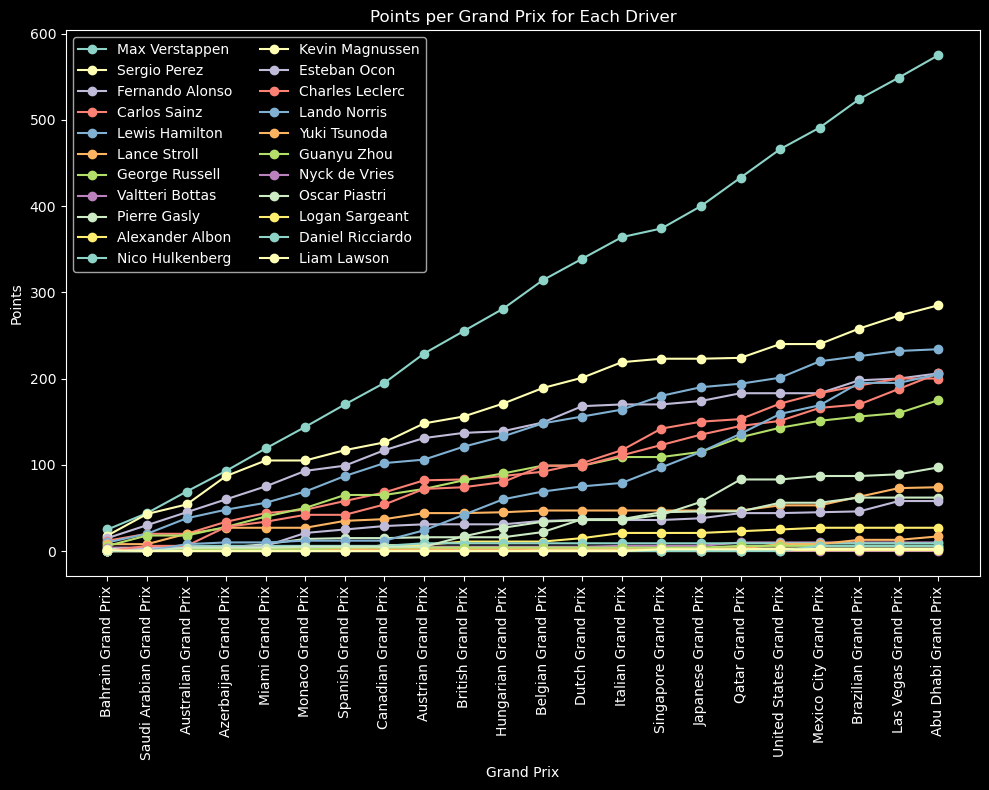

In [31]:
drivers = final['Drivers']
grand_prix = final.columns[1:]
points = final.iloc[:, 1:].values

plt.style.use('dark_background')

plt.figure(figsize=(10, 8))
for i in range(len(drivers)):
    plt.plot(grand_prix, points[i], marker='o', label=drivers[i])

plt.title('Points per Grand Prix for Each Driver')
plt.xlabel('Grand Prix')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

<div style='background:black; border:0; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 35px; color:#FF1801;'>Conclusion</span>
        <hr style="border: 1px solid red;">
    <p style="font-size: 20px; padding: 10px; margin: 0; text-align: left;">
        -Consistency vs. Peaks: Some drivers, like Max Verstappen and Lewis Hamilton, consistently score high points across multiple Grand Prix events, indicating their overall strong performance throughout the season. On the other hand, drivers like George Russell and Pierre Gasly show fluctuations in their point scoring, achieving higher points in certain races while scoring lower or zero points in others.<br>
        -Team Performance: Comparing drivers within the same team can provide insights into team dynamics and performance. For example, Sergio Perez and Max Verstappen both drive for Red Bull Racing, yet there are differences in their point accumulation across different races. Analyzing such differences can shed light on factors such as driver skill, car performance, and race strategies.
</div>


<div style='background:#FF1801; border:0; color:black; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 30px;'>Points vs. Grid Position for Carlos Sainz and George Russell</span>
    </h1>
</div>

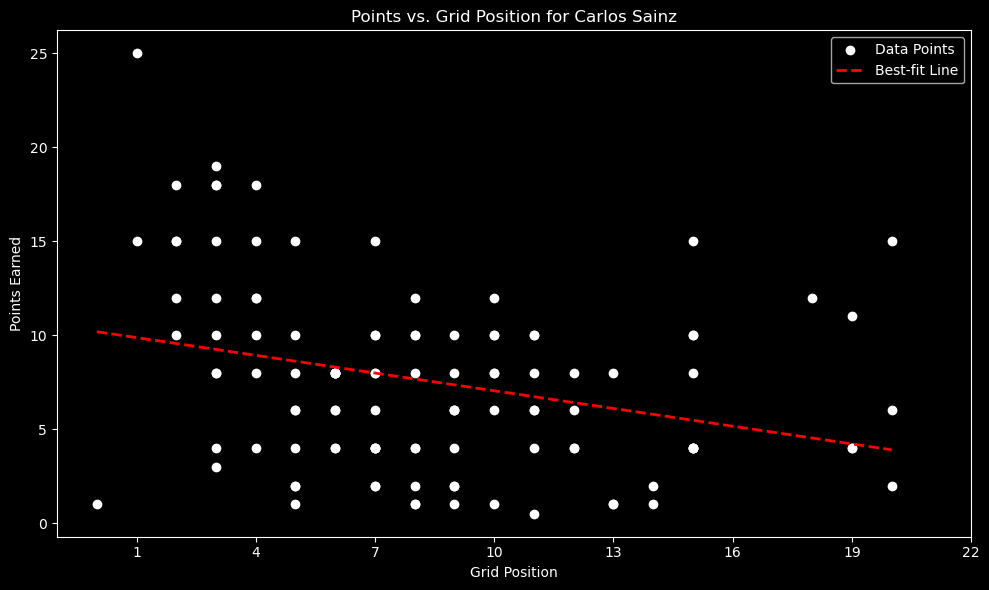

In [59]:
dataset_filtered = dataset1[dataset1['Driver name'] == 'Carlos Sainz']
Carlos_data_filtered = dataset_filtered[dataset_filtered['Points'] != 0]  # Correct filtering

plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
plt.scatter(Carlos_data_filtered['Grid Position'], Carlos_data_filtered['Points'], color='white', label='Data Points')

slope, intercept, _, _, _ = linregress(Carlos_data_filtered['Grid Position'], Carlos_data_filtered['Points'])
x_values = np.array([min(Carlos_data_filtered['Grid Position']), max(Carlos_data_filtered['Grid Position'])])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', linestyle='--', linewidth=2, label='Best-fit Line')

plt.title('Points vs. Grid Position for Carlos Sainz')
plt.xlabel('Grid Position')
plt.ylabel('Points Earned')
plt.xticks(np.arange(1, 23, step=3))
plt.legend()
plt.tight_layout()
plt.show()


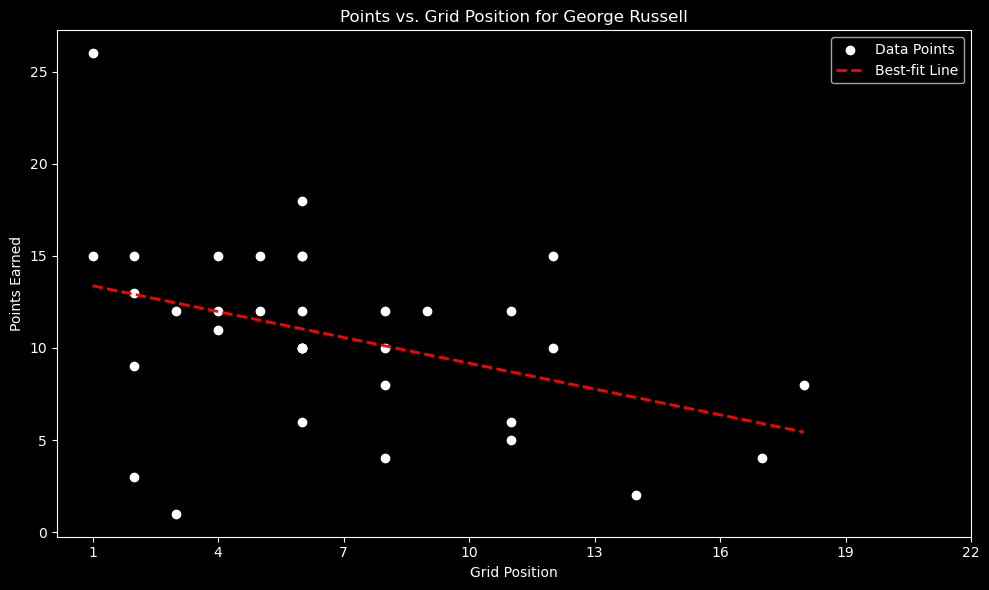

In [60]:
dataset_filtered = dataset1[dataset1['Driver name'] == 'George Russell']
George_data_filtered = dataset_filtered[dataset_filtered['Points'] != 0]  # Correct filtering
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
plt.scatter(George_data_filtered['Grid Position'], George_data_filtered['Points'], color='white', label='Data Points')

slope, intercept, _, _, _ = linregress(George_data_filtered['Grid Position'], George_data_filtered['Points'])
x_values = np.array([min(George_data_filtered['Grid Position']), max(George_data_filtered['Grid Position'])])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', linestyle='--', linewidth=2, label='Best-fit Line')

plt.title('Points vs. Grid Position for George Russell')
plt.xlabel('Grid Position')
plt.ylabel('Points Earned')
plt.xticks(np.arange(1, 23, step=3))
plt.legend()
plt.tight_layout()
plt.show()

<div style='background:black; border:0; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 35px; color:#FF1801;'>Conclusion</span>
        <hr style="border: 1px solid red;">
    <p style="font-size: 20px; padding: 10px; margin: 0; text-align: left;">
        To analyze the relationship between grid position and points scored, I've used scatter plots. Each scatter plot illustrates the grid position (x-axis) against the points scored (y-axis) for each race in the dataset.<br>
Upon examining the scatter plots, several observations can be made:<br>       
-Carlos Sainz: For Sainz, there appears to be a slightly positive correlation between grid position and points scored. This suggests that as Sainz starts from higher grid positions, he tends to score more points, indicating a strong qualifying performance translating into race results.<br>
-George Russell:</strong> In contrast, Russell's scatter plot shows a more scattered distribution, indicating a less consistent relationship between grid position and points scored. While there are instances where Russell scores points from lower grid positions, there are also races where he fails to score despite starting higher on the grid.<br>
Both drivers exhibit variability in their points scored regardless of grid position, indicating that other factors such as race strategy, car performance, and driver skill also play significant roles in determining race outcomes.<br>
<span style="color: red;">In conclusion, while there is a general trend indicating a positive correlation between grid position and points scored, other factors contribute to the variability in race outcomes for both Carlos Sainz and George Russell.</span><br>
    </p>
</div>


<div style='background:#FF1801; border:0; color:black; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 30px;'>Fastest Lap Speed</span>
    </h1>
</div>

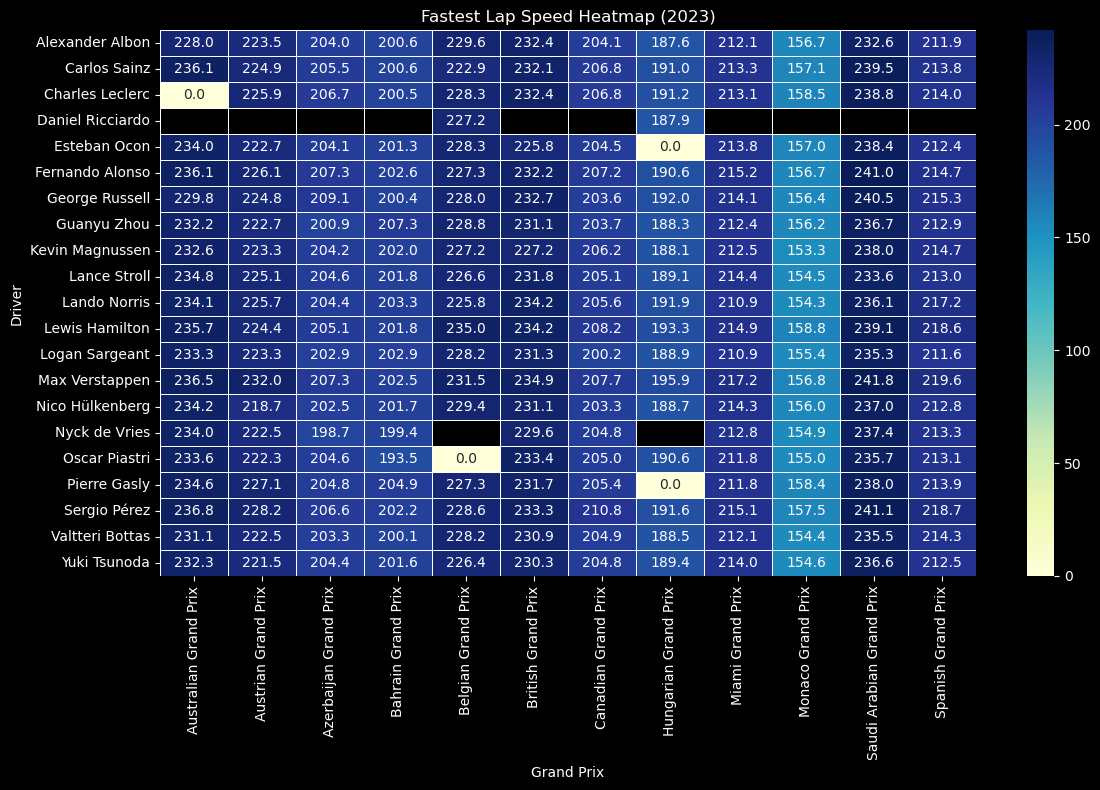

In [82]:
df_2023 = dataset1[dataset1['Year'] == 2023][['Driver name', 'Grand Prix', 'Fastest Lap Speed']]

heatmap_data = df_2023.pivot_table(index='Driver name', columns='Grand Prix', values='Fastest Lap Speed')

plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Fastest Lap Speed Heatmap (2023)')
plt.xlabel('Grand Prix')
plt.ylabel('Driver')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<img src="C:/Users/DELL/Downloads/download (3).jpg" alt="F1 Logo" width="600" height="1200" style="display: block; margin-left: auto; margin-right: auto;">


<div style='background:black; border:0; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 35px; color:#FF1801;'>Conclusion</span>
        <hr style="border: 1px solid red;">
    <p style="font-size: 20px; padding: 10px; margin: 0; text-align: left;">
        Based on the fastest lap speed heatmap, it's evident that Max Verstappen of Red Bull consistently showcased exceptional pace throughout the year, setting impressive fastest lap times across various Grand Prix races. Verstappen's dominance was particularly notable in races like the British, Austrian, and Spanish Grands Prix, where he not only secured victories but also recorded some of the fastest lap speeds of the season. His consistent performance, as reflected in the fastest lap data, played a crucial role in his overall success during the 2023 season. Additionally, drivers Sergio Pérez, Lewis Hamilton, and Fernando Alonso also demonstrated moments of brilliance, achieving notable fastest lap speeds in select races. As we can see, Max Verstappen set the highest lap speed at 241.8 km/h, while Kevin Magnussen recorded the lowest lap speed, reaching only 153.3 km/h.. Notably, the data also reveals an intriguing correlation between track difficulty and lap speed, with the fastest speeds typically achieved on less challenging circuits, further enriching our understanding of the dynamics at play in Formula 1 racing.
    </p>
</div>


<div style='background:#FF1801; border:0; color:black; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 30px;'>Weather Impact on Sainz`s Performance</span>
    </h1>
</div>

In [47]:
def style1(dataframe):
    bg_color_odd = '#f0f0f0'
    bg_color_even = 'white'
    dataframe['Temperature'] = dataframe['Temperature'].round(2)

    format_dict = {'Temperature': '{:.2f} °C'}

    styled_df = dataframe.style\
        .set_properties(**{'text-align': 'center', 'font-size': '12px', 'font-family': 'Georgia, serif', 'color': 'black'})\
        .set_table_styles([{
            'selector': 'th',
            'props': [('border-color', '#666666'),
                      ('border-style', 'solid'),
                      ('border-width', '2px'),
                      ('font-family', 'Georgia, serif'),
                      ('padding', '8px'),
                      ('text-align', 'center'),
                      ('background-color', '#f0f0f0')]
        }, {
            'selector': 'td',
            'props': [('border-color', '#666666'),
                      ('border-style', 'solid'),
                      ('font-family', 'Georgia, serif'),
                      ('border-width', '2px'),
                      ('padding', '8px'),
                      ('background-color', [bg_color_even, bg_color_odd] * (len(dataframe) // 2 + 1))]
        }])\
        .format(format_dict)

    return styled_df

temperature_points = pd.read_excel("C:/Users/DELL/Desktop/temperature_points.xlsx")

styled_temperature_points = style1(temperature_points)
display(styled_temperature_points)


,Grand Prix,Temperature,Points
0,Bahrain Grand Prix,20.00 °C,12
1,Saudi Arabian Grand Prix,26.00 °C,8
2,Australian Grand Prix,16.50 °C,0
3,Azerbaijan Grand Prix,15.50 °C,10
4,Miami Grand Prix,25.50 °C,10
5,Monaco Grand Prix,18.50 °C,4
6,Spanish Grand Prix,19.00 °C,10
7,Canadian Grand Prix,19.00 °C,10
8,Austrian Grand Prix,17.00 °C,8
9,British Grand Prix,16.00 °C,1


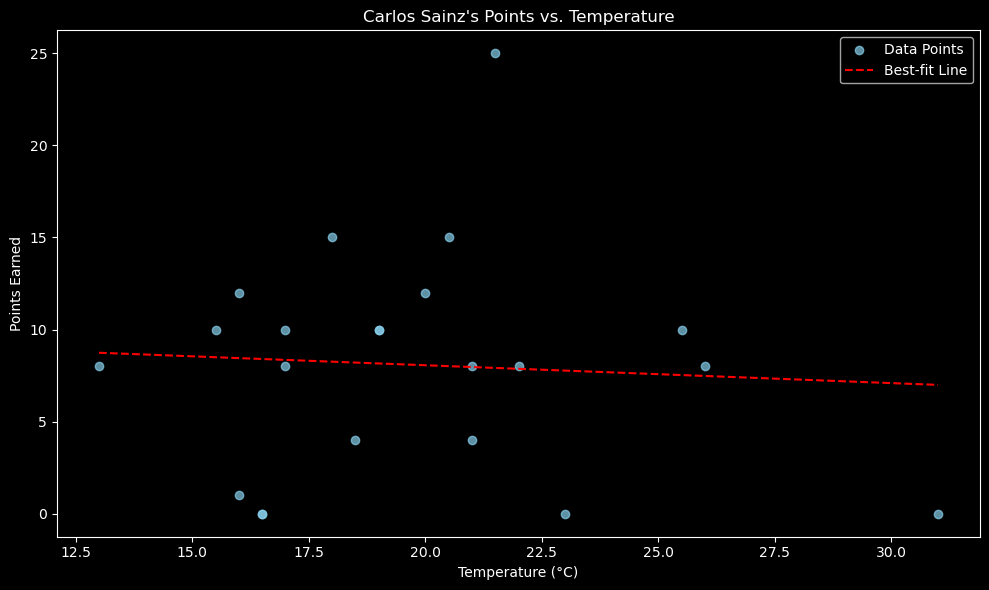

In [84]:
temperatures = temperature_points['Temperature']
sainz_points = temperature_points['Points']

plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
plt.scatter(temperatures, sainz_points, color='skyblue', alpha=0.7, label='Data Points')

slope, intercept, _, _, _ = linregress(temperatures, sainz_points)
x_values = np.linspace(min(temperatures), max(temperatures), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', linestyle='--', label='Best-fit Line')

plt.title("Carlos Sainz's Points vs. Temperature")
plt.xlabel('Temperature (°C)')
plt.ylabel('Points Earned')
plt.legend()
plt.tight_layout()
plt.show()

<div style='background:black; border:0; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 35px; color:#FF1801;'>Conclusion</span>
        <hr style="border: 1px solid red;">
    <p style="font-size: 20px; padding: 10px; margin: 0; text-align: left;">
        The aim was to explore the impact of varying weather conditions on Carlos Sainz's performance in Grand Prix races. By analyzing the fluctuating temperatures and Sainz's corresponding points, we may fail to identify any potential correlations. Despite examining a diverse range of temperature variations (ranging from 13°C to 31°C) and Sainz's fluctuating points (0 to 25), no clear relationship emerged.
    </p>
</div>


<div style='background:#FF1801; border:0; color:black; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 30px;'>Top Ten Constructors of all time</span>
    </h1>
</div>

In [66]:
results = pd.read_csv("C:/Users/DELL/Desktop/results.csv")
constructors = pd.read_csv("C:/Users/DELL/Desktop/constructors.csv")

constructor_data = pd.merge(results, constructors, on='constructorId', how='inner')

columns_to_drop5 = ['resultId','raceId','driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'laps', 'time', 'statusId', 'constructorRef', 'nationality', 'url']
constructor_data = constructor_data.drop(columns=columns_to_drop5)
constructor_data

,points,name
0,10.0,McLaren
1,4.0,McLaren
2,6.0,McLaren
3,4.0,McLaren
4,4.0,McLaren
...,...,...
26075,0.0,Alpine F1 Team
26076,0.0,Alpine F1 Team
26077,0.0,Alpine F1 Team
26078,4.0,Alpine F1 Team


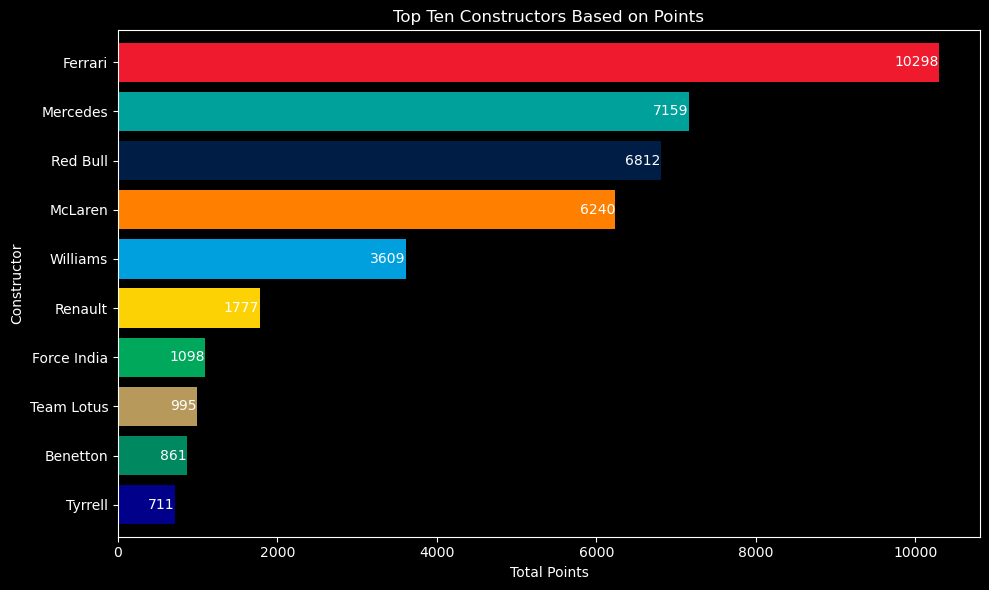

In [49]:
constructor_points = constructor_data.groupby('name')['points'].sum()

top_ten_constructors = constructor_points.sort_values(ascending=False).head(10)

constructor_colors = {
    'Force India': '#FF8000',
    'Renault': '#00A0DE',
    'Mercedes': '#008860',
    'Red Bull': '#B6995B',
    'McLaren': '#00A85C',
    'Team Lotus': '#001D46',
    'Williams': '#fcd205',
    'Benetton': '#00A19B',
    'Tyrrell': '#EF1A2D',
    'Ferrari': '#00008B',   
}

plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
bars = top_ten_constructors.sort_values().plot(kind='barh', color=[constructor_colors[constructor] for constructor in top_ten_constructors.index], width=0.8)
plt.title('Top Ten Constructors Based on Points')
plt.xlabel('Total Points')
plt.ylabel('Constructor')

for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width() - 2, bar.get_y() + bar.get_height() / 2, int(bar.get_width()), ha='right', va='center', color='white')

plt.tight_layout()
plt.show()


<div style='background:black; border:0; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 35px; color:#FF1801;'>Conclusion</span>
        <hr style="border: 1px solid red;">
    <p style="font-size: 20px; padding: 10px; margin: 0; text-align: left;">
        I've conducted an analysis to determine the top ten Formula 1 constructors of all time based on the points they accumulated. After creating a horizontal bar chart, we can observe the dominance of certain teams in the sport's history. Ferrari emerged as the clear leader, followed closely by Mercedes and Red Bull. The bar chart highlighted the consistent success of established teams like McLaren and Williams, as well as the historical significance of entities like Team Lotus and Benetton. Overall, the analysis provided valuable insights into the enduring performance of Formula 1 constructors over the years, visually represented through the bar chart. With a total of 214 constructors in consideration, these top ten teams have demonstrated enduring success and have left a notable mark on the sport's rich history.
    </p>
</div>


<div style='background:#FF1801; border:0; color:black; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 30px;'>Distribution of Formula One Drivers by Country</span>
    </h1>
</div>

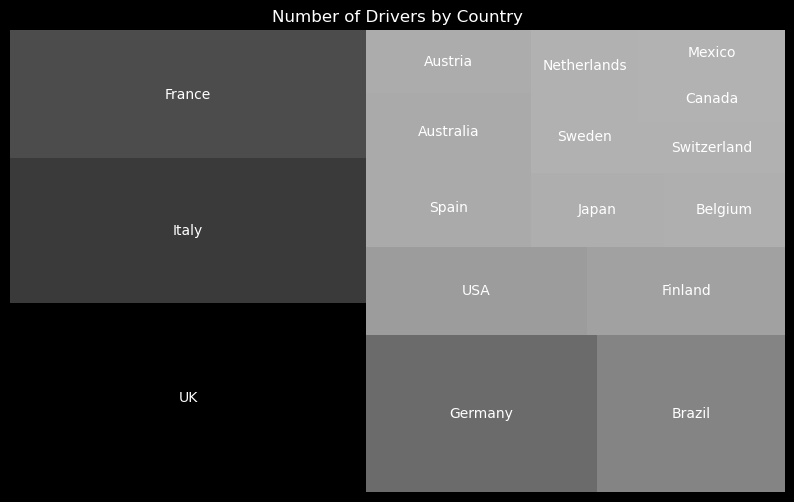

In [65]:
import matplotlib.pyplot as plt
import squarify

cmap = plt.cm.Greys

country_counts = dataset1['Drivers`s Country'].value_counts()

country_counts = country_counts[:-22]

norm = plt.Normalize(vmin=country_counts.min(), vmax=country_counts.max())

colors = [cmap(norm(value)) for value in country_counts]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=country_counts.values, label=country_counts.index, color=colors, alpha=0.7)
plt.axis('off')
plt.title('Number of Drivers by Country')

plt.show()


<div style='background:black; border:0; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75); transform: rotateX(10deg); font-family: "Impact", sans-serif;'>
    <h1 style='padding: 10px; margin: 0; text-align:center;'>
        <span style='font-size: 35px; color:#FF1801;'>Conclusion</span>
        <hr style="border: 1px solid red;">
    <p style="font-size: 20px; padding: 10px; margin: 0; text-align: left;">
        The UK, Italy, and France stand out as the primary sources of Formula One talent, consistently producing a significant number of top-tier drivers.
    </p>
</div>
